In [ ]:
pip install gputil
pip install torch

In [1]:
import GPUtil
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")          # Assigns CUDA device
    cuda_capability = torch.cuda.get_device_capability(device)
    cuda_cores = torch.cuda.get_device_properties(device).multi_processor_count
    print(f"CUDA Cores Available: {cuda_cores}")
    print(f"CUDA Capability: {cuda_capability}")
else:
    print("CUDA is not available on this system.")

# Get the list of available GPUs
gpus = GPUtil.getGPUs()

if gpus:
    # Iterate through each GPU
    for gpu in gpus:
        print(f"GPU Name: {gpu.name}")
        print(f"GPU ID: {gpu.id}")
        print(f"GPU Memory Total: {gpu.memoryTotal} MB")
        print(f"GPU Memory Free: {gpu.memoryFree} MB")
        print(f"GPU Memory Used: {gpu.memoryUsed} MB")
        print(f"GPU Utilization: {gpu.load*100}%")
        print(f"GPU Temperature: {gpu.temperature} °C")
        print("------------------------")
else:
    print("No GPU found.")


CUDA is not available on this system.
GPU Name: GeForce GTX 760
GPU ID: 0
GPU Memory Total: 4096.0 MB
GPU Memory Free: 3371.0 MB
GPU Memory Used: 725.0 MB
GPU Utilization: nan%
GPU Temperature: 31.0 °C
------------------------


## Priprema ParlaSpeechHR .json filea za obradu:

* DIPL.FON: frekvencija glasnika
* JKIM: spomen mladih, studenata, djece
* STAT: seminar neš idk

In [ ]:
#pip install jsonlines

In [5]:
import pandas as pd
import string
import pickle
import jsonlines
import unicodedata
import codecs
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [6]:
# Mapping dictionary for specific character replacements
unicode_mapping = {
    '\u0161': 'š',  # š
    '\u017e': 'ž',  # ž
    '\u010d': 'č',  # č
    '\u0111': 'đ',  # đ
    '\u0107': 'ć'   # ć
}

# Function to normalize words using the mapping dictionary
def normalize_words(words_list):
    normalized_words = []
    for word in words_list:
        normalized_word = ''.join(unicode_mapping.get(char, char) for char in word)
        normalized_words.append(normalized_word)
    return normalized_words

In [7]:
# Function to replace specific Unicode characters in words_list
def replace_unicode_chars(words_list):
    replacements = {
        '\u0161': 'š',  # š
        '\u017e': 'ž',  # ž
        '\u010d': 'č',  # č
        '\u0111': 'đ',  # đ
        '\u0107': 'ć'   # ć
    }
    return ["".join(replacements.get(char, char) for char in word) for word in words_list]

# FREKVENCIJA RIJEČI // 22/12/2023

In [14]:
# Concatenate sentences into a single block of text
text_block = ' '.join(df_combined['sentence'])

output_file_path = 'blok_teksta_jedan_ParlaSpeech-HR.v1.2.txt'

# Open a text file in write mode and save the text block
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(text_block)
print("Saved as .txt!\n")

# Display the first 1000 characters of the text_block
print(text_block[:1000])

Saved as .txt!

lijepo. kolegice i kolege, nemojte se vi varda hihotat, prije 4.g. ste izdali birače, sad jedva čekam da vidim kako će vas nagradit. jedva čekam. hvala lijepo kolegice i kolega, kolege zastupnici, g. potpredsjedniče, hdz želi pokušati dati obećanje za 6 mjeseci da će neki građani dobiti 8 stotina kuna. i jedina svrha ovog zakona su je kampanja, odnosno izbori i predizborna kampanja. jer kako drugačije objasniti da niste dali kada ste imali rast 3%, a sada predlaže kao fol, g. aladrović i plenković se brinu za naše starije sugrađane i evo, kad ćemo imati pad od 10%, izdvojili su 800 kuna. ma dajte molim vas, to nitko ne vjeruje, to ne vjeruje niti, to ne vjeruju niti djeca koja su nažalost danas doma i gledaju, njih 98% školu na televiziji i bilo bi dobro da vlada rh je u stanju organizirati obrazovni sustav da djeca mogu stjecati znanje i obrazovati se. da pokažu da nas mogu vratiti u normalni period nego što jedino razmišljaju o kampanji, izborima i kako osigurati plen

# Otvaranje .txt i frekvencija riječi // 10/1/2024

In [8]:
# OPENING TXT FILE
# File path to the previously saved text file
input_file_path = 'blok_teksta_jedan_ParlaSpeech-HR.v1.2.txt'

# Open the text file in read mode and read its contents
with open(input_file_path, 'r', encoding='utf-8') as file:
    text_from_file = file.read()

# Now 'text_from_file' contains the contents of the file
# You can assign it to the 'text_block' variable if needed
text_block = text_from_file


In [9]:
# Assuming text_block contains your concatenated text

# Remove punctuation and convert the text to lowercase
clean_text = text_block.translate(str.maketrans('', '', string.punctuation)).lower()

# Split the text into words
words = clean_text.split()

# Count the frequency of each word
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Sort the word frequencies by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame with 'Rank', 'Word', and 'Frequency' columns
ranked_word_freq = [{'Rank': rank + 1, 'Word': word[0], 'Frequency': word[1]} for rank, word in enumerate(sorted_word_freq)]

# Convert to DataFrame
df = pd.DataFrame(ranked_word_freq)

# Display the DataFrame
print(df)


          Rank        Word  Frequency
0            1           i     557188
1            2          je     406846
2            3          da     401518
3            4           u     376921
4            5          se     293499
...        ...         ...        ...
183166  183167  iskažnjava          1
183167  183168   segmentić          1
183168  183169        šemu          1
183169  183170      svijež          1
183170  183171        6206          1

[183171 rows x 3 columns]


In [23]:
# Assuming 'df' is the DataFrame containing 'Rank', 'Word', and 'Frequency' columns

# Get the top 100 words by frequency
top_100 = df.head(100)

# Get the bottom 100 words by frequency
bottom_100 = df.tail(100)
prnt = "no print"

if prnt == "yes":
    # Display the top 100 words and their frequencies
    print("Top 100 Words")
    print("Rank   Word    Frequency")
    print("------------------------")
    for index, row in top_100.iterrows():
        rank = row['Rank']
        word = row['Word']
        frequency = row['Frequency']
        print(f"{rank:<8}{word:<10}{frequency}")
    
    # Display the bottom 100 words and their frequencies
    print("\nBottom 100 Words")
    print("Rank   Word    Frequency")
    print("------------------------")
    for index, row in bottom_100.iterrows():
        rank = row['Rank']
        word = row['Word']
        frequency = row['Frequency']
        print(f"{rank:<8}{word:<30}{frequency}")
else:
    print("Not printing top and bottom 100, but done")


Not printing top and bottom 100, but done


In [28]:
# Assuming ranked_word_freq contains the ranked word frequencies

# Count the total number of entries in the dictionary
total_entries = len(ranked_word_freq)

# Display the total number of entries
print(f'Total number of unique words in corpus: {total_entries}')
# Assuming frequencies is a list containing frequency values

frequencies = [freq for word, freq in sorted_word_freq]
# Calculate the sum of all frequencies
total_frequency_sum = sum(frequencies)

# Display the total sum of frequencies
print(f'The sum of all words/frequencies is: {total_frequency_sum}')
#print(frequencies)


Total number of unique words in corpus: 183171
The sum of all words/frequencies is: 14418984


In [93]:
import matplotlib.pyplot as plt

# Assuming sorted_word_freq contains the sorted word frequencies

# Create lists of ranks and frequencies for all entries
ranks = list(range(1, len(sorted_word_freq) + 1))
frequencies = [freq for word, freq in sorted_word_freq]

# Create lists of ranks and frequencies for the first 100 points
ranks100 = list(range(1, 101))
frequencies100 = [freq for word, freq in sorted_word_freq[:100]]


percentages = (frequencies / np.sum(frequencies))
frequencies = percentages

# # Create the plot for the first 1000 points
# plt.figure(figsize=(10, 6))
# plt.plot(ranks100, frequencies100, marker='o', linestyle='-')
# plt.title('Word Frequency Rank vs Frequency (First 1000 Points)')
# plt.xlabel('Word Frequency Rank')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

print(frequencies[:10])


[0.03864267 0.028216   0.02784648 0.02614061 0.02035504 0.01432916
 0.01321425 0.00933096 0.00921272 0.00913747]


In [94]:
# Slice the data to include only the first 100 ranks and fitted curve points
ranks_100 = ranks[:100]
frequencies_100 = frequencies[:100]

# Slice the data to include only the first 1000 ranks and fitted curve points
ranks_1000 = ranks[:1000]
frequencies_1000 = frequencies[:1000]

# ranks = ranks_100
# frequencies = frequencies_100

In [95]:
# Define the Zipf distribution function
def zipf_distribution(r, A, b):
    return A / np.power(r, b)
    
# Perform curve fitting for Zipf distribution
params_zipf, covariance_zipf = curve_fit(zipf_distribution, ranks, frequencies)

# Extract fitted parameters for Zipf distribution
A_zipf, b_zipf = params_zipf

# Generate the fitted Zipf curve using the fitted parameters
fitted_curve_zipf = zipf_distribution(ranks, A_zipf, b_zipf)

print(f"Fitted Parameters for Zipf Distribution:\n A = {A_zipf}, b = {b_zipf}")

Fitted Parameters for Zipf Distribution:
 A = 0.047440656270569884, b = 0.786635640376905


In [96]:
# Define Yule's law function
def yules_law(r, A, b, c):
    return A * np.power(r, b) * np.power(c, r)

# Perform curve fitting
popt, pcov = curve_fit(yules_law, ranks, frequencies, maxfev=10000)

# Extract fitted parameters
A_fit, b_fit, c_fit = popt

# Print the fitted parameters
print("Fitted Parameters for Yule's distribution:")
print(f"A = {A_fit}, b = {b_fit}, c = {c_fit}")

# Generate the fitted curve using the fitted parameters
fitted_curve_yule = yules_law(ranks, A_fit, b_fit, c_fit)

Fitted Parameters for Yule's distribution:
A = 0.04406896334931315, b = -0.6505143109716336, c = 0.9940515763272164


In [129]:
# # Convert ranks list to NumPy array
# ranks_array = np.array(ranks)

# n = total_entries  # value of n
# # Define Sigurd's law function
# def sigurd_law(r, k):
#     return ((1 - k) * np.power(k, (r - 1))) / (1 - np.power(k, n))

# # Perform curve fitting for Sigurd's law with adjusted parameters
# popt_sigurd, pcov_sigurd = curve_fit(sigurd_law, ranks_array, frequencies, p0=[0.5], maxfev=20000)


# # Extract fitted parameter for Sigurd's law (k value)
# k_fit = popt_sigurd[0]

# # Print the fitted parameter for Sigurd's law
# print("Fitted Parameter for Sigurd's distribution:")
# print(f"k = {k_fit}")

# # Calculate alp_fit using the provided formula
# alp_fit = (1 - k_fit) / (k_fit * (1 - np.power(k_fit, n)))

# # Generate the fitted curve using the calculated alp_fit and k_fit for Sigurd's law
# fitted_curve_sigurd = sigurd_law(ranks_array, k_fit)


Fitted Parameter for Sigurd's distribution:
k = 0.9887204573868258


In [142]:
# Define Sigurd's law function
def sigurd_law(r, k):
    n = total_entries  # value of n
    a = (1 - k) / (k * (1 - np.power(k, n)))
    return a * np.power(k, r - 1)
    
# Perform curve fitting for Sigurd's law with adjusted parameters
popt_sigurd, pcov_sigurd = curve_fit(sigurd_law, ranks_array, frequencies, p0=[0.5], maxfev=20000)

# Extract fitted parameter for Sigurd's law (k value)
k_fit = popt_sigurd[0]

# Calculate the 'a' value based on the obtained 'k' value
a_fit = (1 - k_fit) / (k_fit * (1 - np.power(k_fit, n)))
b_fit = 0

# Print the fitted parameters for Sigurd's law
print("Fitted Parameters for Sigurd's distribution:")
print(f"a = {a_fit}, b = {b_fit}, c = {k_fit}")

# Generate the fitted curve using the fitted parameters for Sigurd's law
#fitted_curve_sigurd = sigurd_law(ranks_array, k_fit)
fitted_curve_sigurd = yules_law(ranks_array, a_fit, b_fit, k_fit)

Fitted Parameters for Sigurd's distribution:
a = 0.010882417037853575, b = 0, c = 0.9892347350646954


In [143]:
# Define Borodovsky and Gusein-Zade (BGZ) law function
def bgz_law(r, n):
    return (1 / n) * (np.log(n + 1) - np.log(r))

n = total_entries  # value of n

# Assuming 'ranks' contains the rank values for which you want to calculate Fr
bgz_values = bgz_law(ranks, n)
print(bgz_values)
print(f"lenght: {len(bgz_values)}, n: {n}")

[6.61577481e-05 6.23735946e-05 6.01600067e-05 ... 8.94147172e-11
 5.96096488e-11 2.98047430e-11]
lenght: 183171, n: 183171


In [144]:
# Calculate the mean of the actual data
mean_actual = np.mean(frequencies)

# Calculate total sum of squares (TSS)
tss = np.sum((frequencies - mean_actual) ** 2)


# Calculate residuals for Yule's law and Zipf's law
residuals_yule = frequencies - fitted_curve_yule
residuals_zipf = frequencies - fitted_curve_zipf
residuals_sigurd = frequencies - fitted_curve_sigurd
residuals_bgz = frequencies - bgz_values

# Calculate residual sum of squares (RSS)
rss_yule = np.sum(residuals_yule ** 2)
rss_zipf = np.sum(residuals_zipf ** 2)
rss_sigurd = np.sum(residuals_sigurd ** 2)
rss_bgz = np.sum(residuals_bgz ** 2)

# Calculate R^2 for Yule's law and Zipf's law
r_squared_yule = 1 - (rss_yule / tss)
r_squared_zipf = 1 - (rss_zipf / tss)
r_squared_sigurd = 1 - (rss_sigurd / tss)
r_squared_bgz = 1 - (rss_bgz / tss)

print(f"R^2 for Yule's Law: {r_squared_yule}")
print(f"R^2 for Zipf's Law: {r_squared_zipf}")
print(f"R^2 for Sigurd's Law: {r_squared_sigurd}")
print(f"R^2 for BGZ Law: {r_squared_bgz}")


R^2 for Yule's Law: 0.9550179202327509
R^2 for Zipf's Law: 0.9351150130685576
R^2 for Sigurd's Law: 0.40835938421583673
R^2 for BGZ Law: 0.010255599761443301


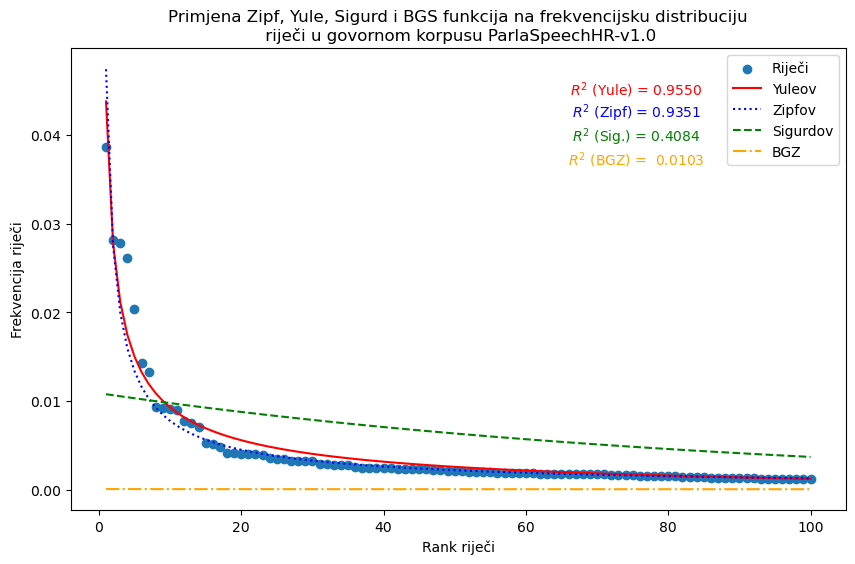

In [148]:
# Plotting both curves and original data
fitted_curve_yule_100 = fitted_curve_yule[:100]
fitted_curve_zipf_100 = fitted_curve_zipf[:100]
fitted_curve_sig_100 = fitted_curve_sigurd[:100]
fitted_curve_bgz_100 = fr_values[:100]

# Plot only the first 100 ranks and their fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(ranks_100, frequencies_100, label='Riječi')
plt.plot(ranks_100, fitted_curve_yule_100, color='red', label='Yuleov', linestyle='-')
plt.plot(ranks_100, fitted_curve_zipf_100, color='blue', label='Zipfov', linestyle=':')
plt.plot(ranks_100, fitted_curve_sig_100, color='green', label='Sigurdov', linestyle='--')
plt.plot(ranks_100, fitted_curve_bgz_100, color='orange', label='BGZ', linestyle='-.')

plt.xlabel('Rank riječi')
plt.ylabel('Frekvencija riječi')
plt.title('Primjena Zipf, Yule, Sigurd i BGS funkcija na frekvencijsku distribuciju\n riječi u govornom korpusu ParlaSpeechHR-v1.0')
plt.legend()

# Annotate the plot with R^2 for Yule's Law
plt.text(0.73, 0.91, r"$R^2$ (Yule) = " + f"{r_squared_yule:.4f}", ha='center', va='center', transform=plt.gca().transAxes, color='red')
plt.text(0.73, 0.86, r"$R^2$ (Zipf) = " + f"{r_squared_zipf:.4f}", ha='center', va='center', transform=plt.gca().transAxes, color='blue')
plt.text(0.73, 0.81, r"$R^2$ (Sig.) = " + f"{r_squared_sigurd:.4f}", ha='center', va='center', transform=plt.gca().transAxes, color='green')
plt.text(0.73, 0.76, r"$R^2$ (BGZ) =  " + f"{r_squared_bgz:.4f}", ha='center', va='center', transform=plt.gca().transAxes, color='orange')



# Saving the plot as a .png file
plt.savefig('yule_zipf_sigurd_bgz_poredba_WORDS100_HR_v3.2.png', dpi=300)  # Specify the filename and dpi (dots per inch)

plt.show()

# PARSIRANJE NJ LJ DŽ

In [40]:
# from collections import Counter

# # Concatenate all sentences into a single string
# all_text = ' '.join(df_combined['sentence'])

# # Count the frequency of each character
# character_frequency = Counter(all_text.lower())  # Convert to lowercase for uniform counting

# # Display the character frequencies
# print(character_frequency)


Counter({' ': 14419033, 'a': 8473320, 'o': 7134726, 'i': 7050533, 'e': 6080196, 'n': 4648748, 't': 3651668, 'r': 3511665, 'j': 3419250, 's': 3255595, 'd': 2834497, 'u': 2828080, 'v': 2702877, 'm': 2543126, 'k': 2461565, 'l': 2239951, 'p': 2027631, 'z': 1281364, 'g': 1117595, ',': 966159, 'b': 952252, 'š': 681802, '.': 633399, 'č': 565108, 'h': 519356, 'c': 512317, 'ć': 477359, 'ž': 410163, 'đ': 163320, 'f': 122684, '0': 121397, '1': 73991, '2': 69318, '-': 60284, '5': 36839, '?': 34026, '3': 32637, '4': 23869, '6': 21275, '7': 20024, '8': 18816, '%': 18226, '9': 17383, "'": 4564, '_': 3838, '„': 3129, '“': 3083, 'x': 2429, '/': 1820, ':': 1656, 'w': 1581, 'y': 1202, '!': 416, ')': 352, '(': 258, '+': 238, 'q': 134, ';': 77, '"': 41, 'ü': 39, '¾': 35, '&': 26, '–': 22, '¼': 22, '>': 10, '—': 10, '@': 10, '’': 8, 'ö': 7, '̊': 6, '=': 4, '#': 4, '¸': 3, 'ӧ': 3, '‰': 3, '*': 2, '€': 2, 'ä': 2, '°': 1, '½': 1, '´': 1, '′': 1, 'ô': 1, 'ţ': 1, 'π': 1})


In [6]:
from collections import Counter

# Concatenate all sentences into a single string
all_text = ' '.join(df_combined['sentence'])

# Convert all the text to lowercase
all_text_lower = all_text.lower()

# Define special character sequences to be removed
special_sequences = ["nj", "lj", "dž"]

# Initialize counters for special sequences
special_sequence_counts = {seq: 0 for seq in special_sequences}

# Count occurrences of special sequences and remove them from the text
for seq in special_sequences:
    count = all_text_lower.count(seq)
    special_sequence_counts[seq] = count
    all_text_lower = all_text_lower.replace(seq, '')

# Count the frequency of each character
character_frequency = Counter(all_text_lower)

# Display the character frequencies and counts of special sequences
print("Character frequencies:")
print(character_frequency)
print("\nCounts of special sequences:")
print(special_sequence_counts)


Character frequencies:
Counter({' ': 14419033, 'a': 8473320, 'o': 7134726, 'i': 7050533, 'e': 6080196, 'n': 4218185, 't': 3651668, 'r': 3511665, 's': 3255595, 'd': 2831100, 'u': 2828080, 'v': 2702877, 'j': 2634376, 'm': 2543126, 'k': 2461565, 'p': 2027631, 'l': 1885640, 'z': 1281364, 'g': 1117595, ',': 966159, 'b': 952252, 'š': 681802, '.': 633399, 'č': 565108, 'h': 519356, 'c': 512317, 'ć': 477359, 'ž': 406766, 'đ': 163320, 'f': 122684, '0': 121397, '1': 73991, '2': 69318, '-': 60284, '5': 36839, '?': 34026, '3': 32637, '4': 23869, '6': 21275, '7': 20024, '8': 18816, '%': 18226, '9': 17383, "'": 4564, '_': 3838, '„': 3129, '“': 3083, 'x': 2429, '/': 1820, ':': 1656, 'w': 1581, 'y': 1202, '!': 416, ')': 352, '(': 258, '+': 238, 'q': 134, ';': 77, '"': 41, 'ü': 39, '¾': 35, '&': 26, '–': 22, '¼': 22, '>': 10, '—': 10, '@': 10, '’': 8, 'ö': 7, '̊': 6, '=': 4, '#': 4, '¸': 3, 'ӧ': 3, '‰': 3, '*': 2, '€': 2, 'ä': 2, '°': 1, '½': 1, '´': 1, '′': 1, 'ô': 1, 'ţ': 1, 'π': 1})

Counts of specia

In [7]:
#abcčćdđefghijklmnoprsštuvzž
# Your list of characters
characters = list('abcčćdđefghijklmnoprsštuvzž')

# Add 'nj', 'lj', and 'dž' to the list of characters
special_sequences = ['nj', 'lj', 'dž']
characters += special_sequences

# Create a dictionary to hold character frequencies
char_freq_dict = {char: character_frequency[char] for char in characters}

# Include counts of special sequences in char_freq_dict
char_freq_dict.update(special_sequence_counts)

# Sort char_freq_dict by frequency in descending order
char_freq_dict = dict(sorted(char_freq_dict.items(), key=lambda x: x[1], reverse=True))

# Display the character frequencies
print(char_freq_dict)


{'a': 8473320, 'o': 7134726, 'i': 7050533, 'e': 6080196, 'n': 4218185, 't': 3651668, 'r': 3511665, 's': 3255595, 'd': 2831100, 'u': 2828080, 'v': 2702877, 'j': 2634376, 'm': 2543126, 'k': 2461565, 'p': 2027631, 'l': 1885640, 'z': 1281364, 'g': 1117595, 'b': 952252, 'š': 681802, 'č': 565108, 'h': 519356, 'c': 512317, 'ć': 477359, 'nj': 430563, 'ž': 406766, 'lj': 354311, 'đ': 163320, 'f': 122684, 'dž': 3397}


In [8]:
# Calculate the total sum of frequencies
total_sum = sum(char_freq_dict.values())

# Merge counts and percentages into the same dictionary
combined_dict = {char: {'count': freq, 'freq%': round((freq / total_sum) * 100, 3)} for char, freq in char_freq_dict.items()}

# Display the combined dictionary
print(combined_dict)


{'a': {'count': 8473320, 'freq%': 11.955}, 'o': {'count': 7134726, 'freq%': 10.066}, 'i': {'count': 7050533, 'freq%': 9.947}, 'e': {'count': 6080196, 'freq%': 8.578}, 'n': {'count': 4218185, 'freq%': 5.951}, 't': {'count': 3651668, 'freq%': 5.152}, 'r': {'count': 3511665, 'freq%': 4.954}, 's': {'count': 3255595, 'freq%': 4.593}, 'd': {'count': 2831100, 'freq%': 3.994}, 'u': {'count': 2828080, 'freq%': 3.99}, 'v': {'count': 2702877, 'freq%': 3.813}, 'j': {'count': 2634376, 'freq%': 3.717}, 'm': {'count': 2543126, 'freq%': 3.588}, 'k': {'count': 2461565, 'freq%': 3.473}, 'p': {'count': 2027631, 'freq%': 2.861}, 'l': {'count': 1885640, 'freq%': 2.66}, 'z': {'count': 1281364, 'freq%': 1.808}, 'g': {'count': 1117595, 'freq%': 1.577}, 'b': {'count': 952252, 'freq%': 1.343}, 'š': {'count': 681802, 'freq%': 0.962}, 'č': {'count': 565108, 'freq%': 0.797}, 'h': {'count': 519356, 'freq%': 0.733}, 'c': {'count': 512317, 'freq%': 0.723}, 'ć': {'count': 477359, 'freq%': 0.673}, 'nj': {'count': 43056

In [15]:
import csv

# File path to save the CSV
file_path = 'Frekvencija_glasnika_ParlaSpeechHR_v2.0.csv'

# Writing the sorted dictionary to a CSV file with UTF-8 encoding
with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Character', 'Count', 'Freq%']  # Updated field names
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write the data rows
    for char, data in sorted_combined.items():
        writer.writerow({'Character': char, 'Count': data['count'], 'Freq%': data['freq%']})

print(f"CSV file '{file_path}' has been saved.")


CSV file 'Frekvencija_glasnika_ParlaSpeechHR_v2.0.csv' has been saved.


In [63]:
import jsonlines

# Path to your JSONL file
jsonl_file_path = 'ParlaSpeech-HR.v1.0.jsonl'

total_word_count = 0

# Read the JSONL file and count words in each line
with jsonlines.open(jsonl_file_path, 'r') as file:
    for line in file:
        if 'words' in line:  # Check if 'words' field exists
            words_list = line['words']  # Assuming 'words' is a list field in each JSON object
            total_word_count += len(words_list)

print(f"Total number of words in the JSONL file: {total_word_count}")


Total number of words in the JSONL file: 14419034


# Frekvencije glasnika u ParlaSpeechHR-v1.0 (v1.0)

Character,Count,Freq%
a,8473320,11.823
o,7134726,9.955
i,7050533,9.838
e,6080196,8.484
n,4648748,6.487
t,3651668,5.095
r,3511665,4.9
j,3419250,4.771
s,3255595,4.543
d,2834497,3.955
u,2828080,3.946
v,2702877,3.771
m,2543126,3.549
k,2461565,3.435
l,2239951,3.126
p,2027631,2.829
z,1281364,1.788
g,1117595,1.559
b,952252,1.329
š,681802,0.951
č,565108,0.789
h,519356,0.725
c,512317,0.715
ć,477359,0.666
ž,410163,0.572
đ,163320,0.228
f,122684,0.171